#### Notes

Regression models (both linear and non-linear) are used for predicting a real value, like salary for example. If your independent variable is time, then you are forecasting future values, otherwise your model is predicting present but unknown values. Regression technique vary from Linear Regression to SVR and Random Forests Regression.

**Simple Linear Regression**

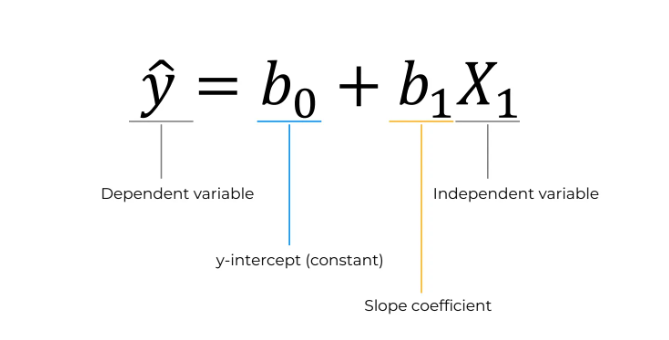

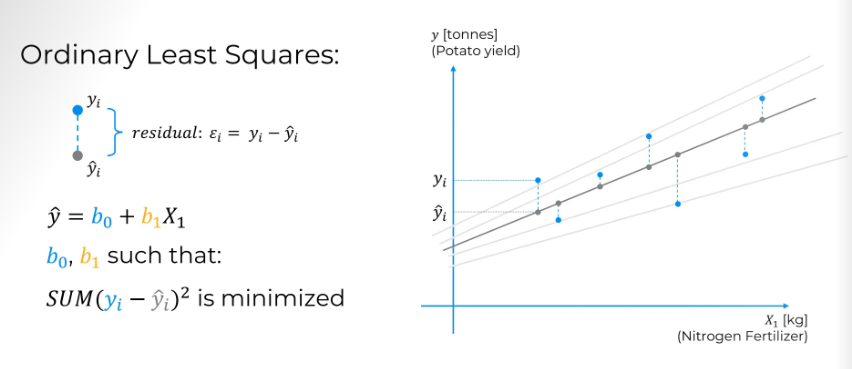

**Multiple Linear Regression**

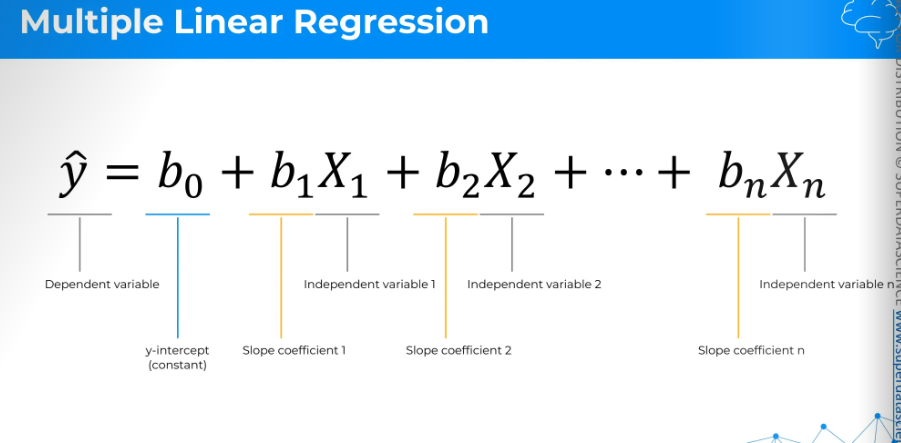

**Assumptions of Linear Regression**

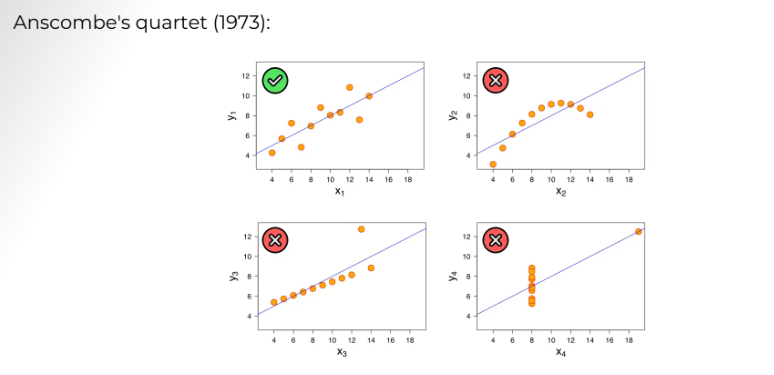

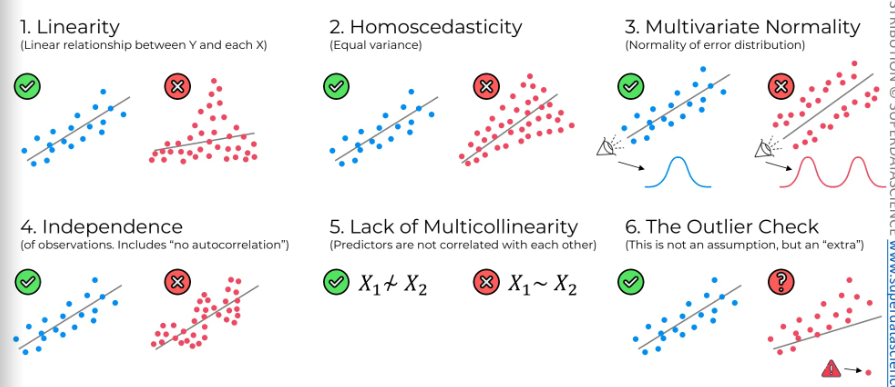

**Dummy variables and Dummy variables trap**
* Use dummy variables using one hot encoding to encode categorical variables into numerical variables. (NY = [1, 0], CA = [0, 1]).
* Using all dummy variables lead to the dummy variable trap since one variable would be related to all others.
* Use one less dummy variable to avoid to dummy variable trap.

**Building a Model**

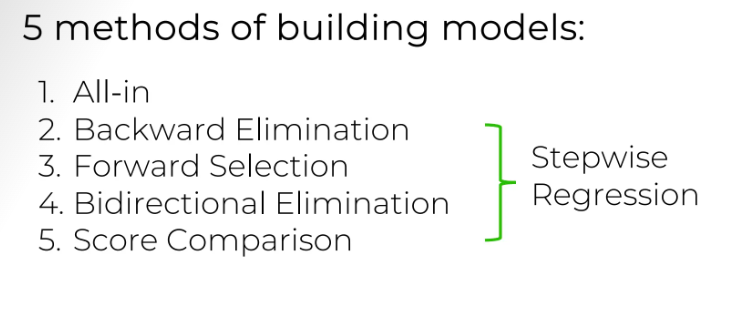

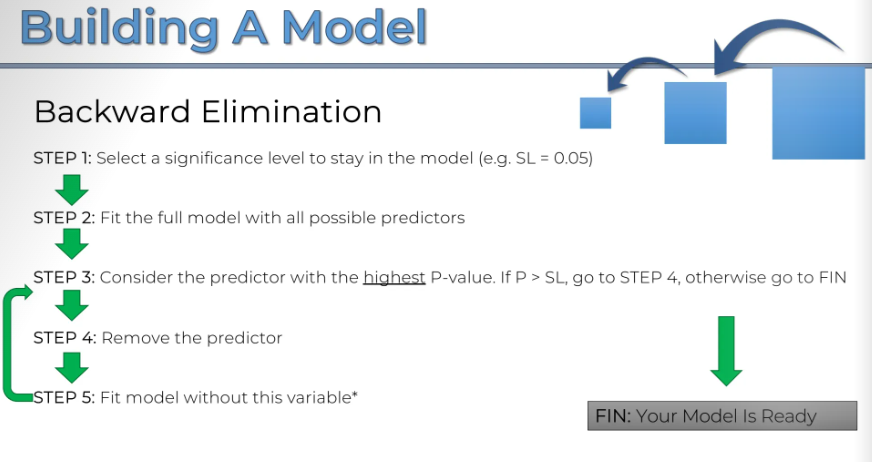

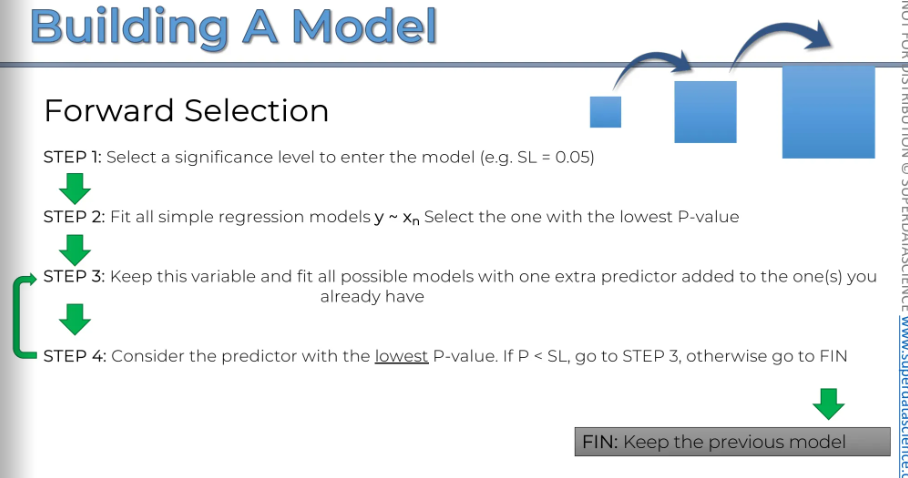

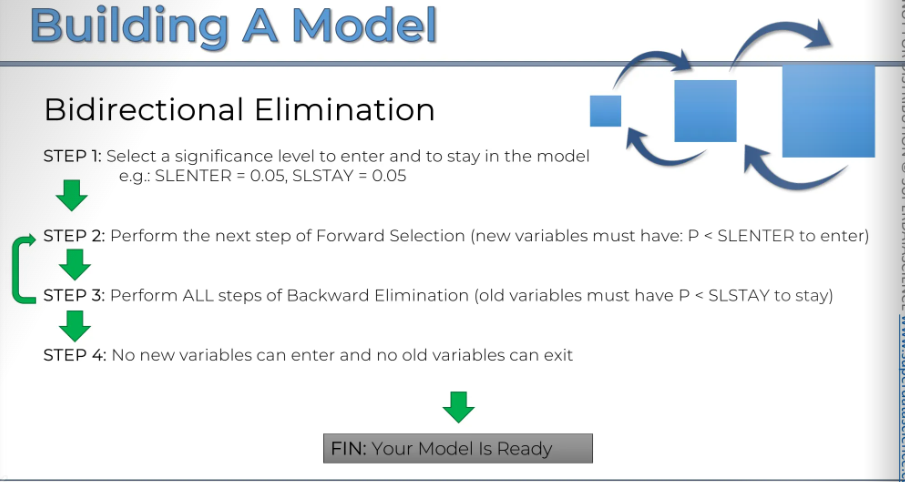

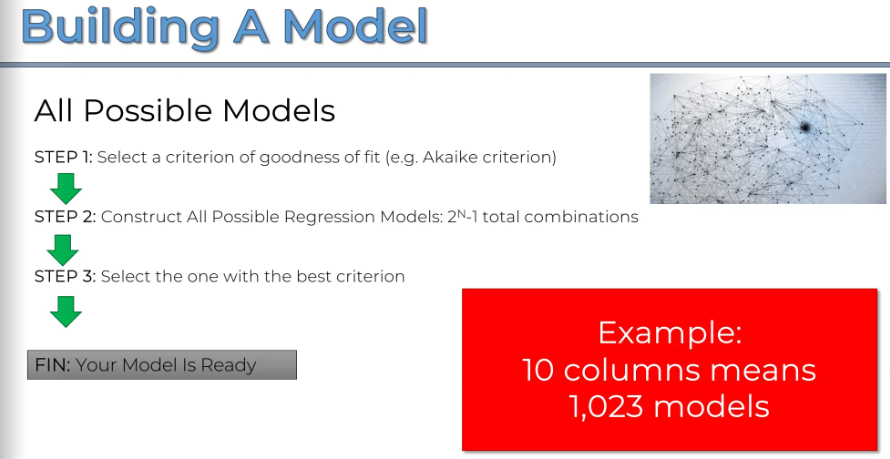


**Polynomial Linear Regression**
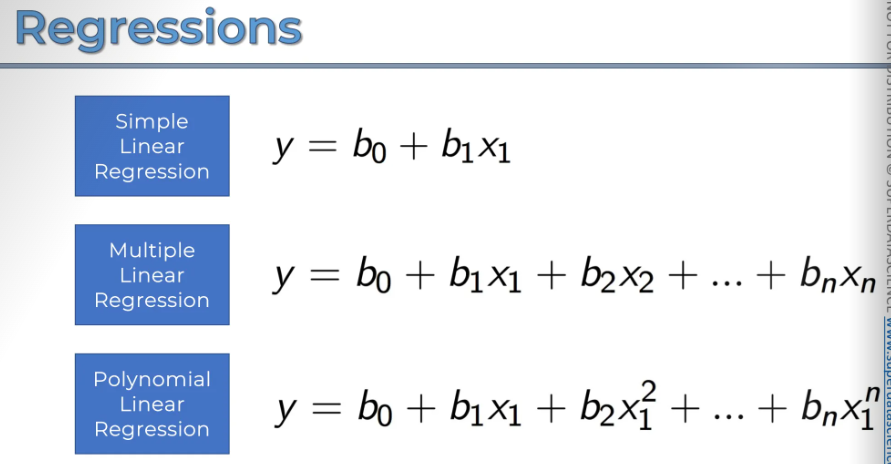

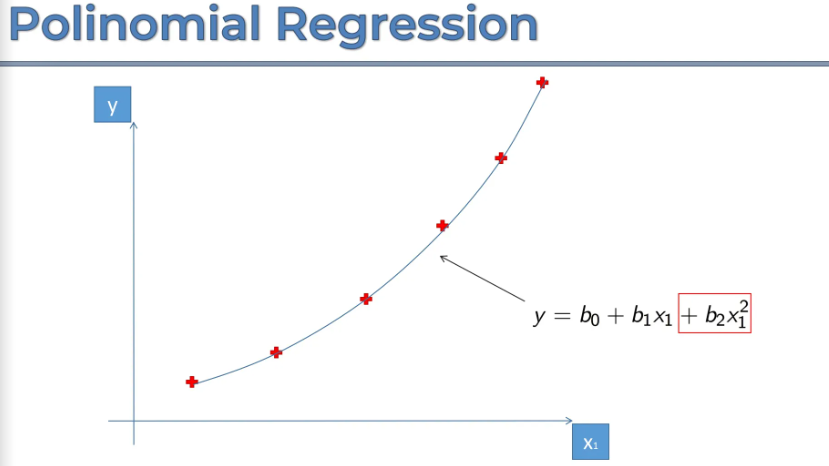

#### Importing Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('datasets/Salary_Data.csv')

In [4]:
X = dataset.iloc[:, :-1].values #Features
y = dataset.iloc[:, -1].values #Dependent Variable
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


#### Data Preprocessing

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Simple Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train) # Training LR
y_pred = regressor.predict(X_test) # Predicting

print("y_test  ", "y_pred")
for i in range(len(y_test)):
    print(y_test[i], y_pred[i])

y_test   y_pred
37731.0 40748.96184072196
122391.0 122699.62295593883
57081.0 64961.65717021785
63218.0 63099.142144872014
116969.0 115249.56285455546
109431.0 107799.50275317213


Text(0, 0.5, 'Salary')

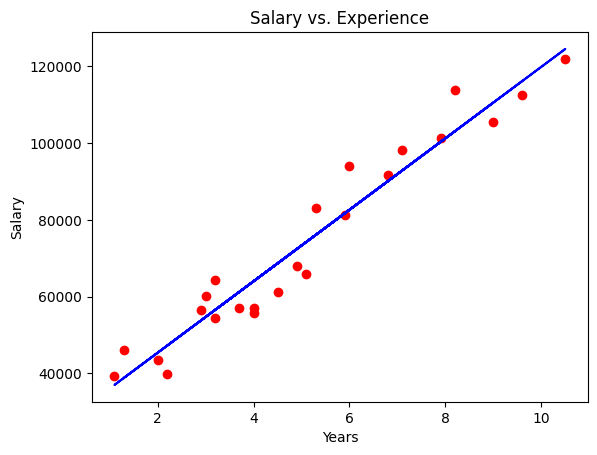

In [23]:
# Plotting train set results
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title("Salary vs. Experience")
plt.xlabel("Years")
plt.ylabel("Salary")

Text(0, 0.5, 'Salary')

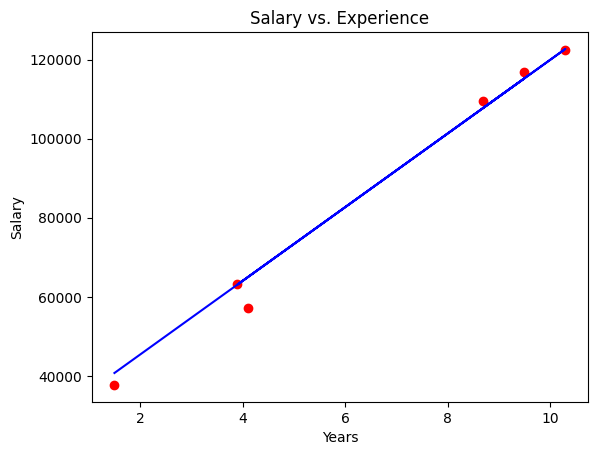

In [24]:
# Plotting test set results
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred, color='blue')
plt.title("Salary vs. Experience")
plt.xlabel("Years")
plt.ylabel("Salary")

In [26]:
#single output:
single_prediction = regressor.predict([[12]])
print("Single Prediction", single_prediction)

# y = b0 + b1X - linear regression equation
# Finding b0 and b1
b0 = regressor.intercept_
b1 = regressor.coef_
print("b0", b0)
print("b1", b1)

Single Prediction [138531.00067138]
b0 26780.09915062818
b1 [9312.57512673]


#### Multiple Linear Regression

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('datasets/50_Startups.csv')
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train) # Training LR
y_pred = regressor.predict(X_test) # Predicting

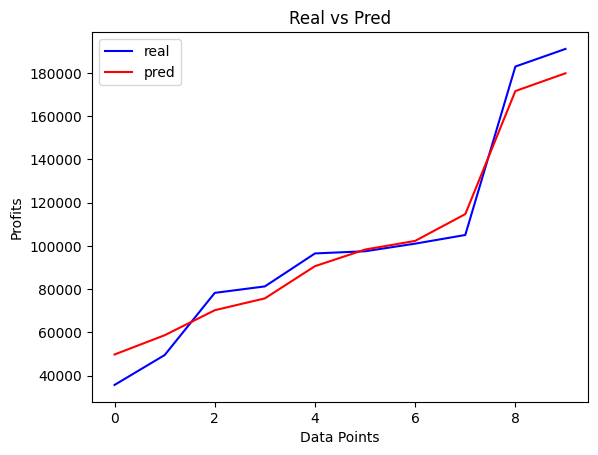

In [37]:
# Plotting train set results
plt.plot(sorted(y_test), color='blue', label='real')
plt.plot(sorted(y_pred), color='red', label='pred')
plt.title("Real vs Pred")
plt.xlabel("Data Points")
plt.ylabel("Profits")
plt.legend()

#### Polynomial Linear Regression

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('datasets/Position_Salaries.csv')
X = dataset.iloc[:, 1:-1]
y = dataset.iloc[:, -1]
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

lin_reg = LinearRegression()
lin_reg.fit(X, y) # Training simple LR
X_poly = PolynomialFeatures(degree=3).fit_transform(X)
poly_reg = LinearRegression().fit(X_poly, y) # Training polynomial LR

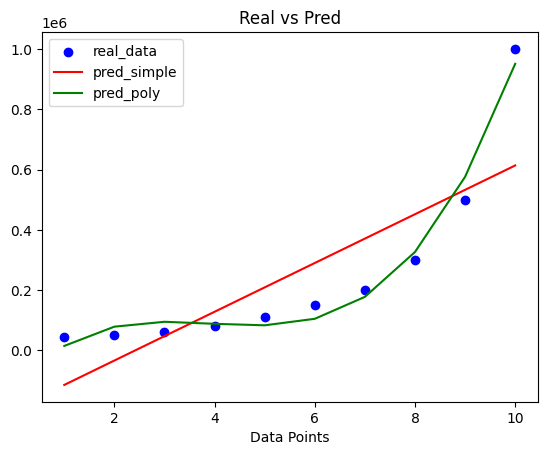

In [49]:
# Plotting train set results
plt.scatter(X, y, color = 'blue', label='real_data')
plt.plot(X, lin_reg.predict(X), color='red', label='pred_simple')
plt.plot(X, poly_reg.predict(X_poly), color='green', label='pred_poly')

plt.title("Real vs Pred")
plt.xlabel("Data Points")
plt.legend()

In [50]:
print(lin_reg.predict([[6.5]]))
print(poly_reg.predict(PolynomialFeatures(degree=3).fit_transform([[6.5]])))

[330378.78787879]
[133259.46969697]


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
